In [1]:
import graphlab
import matplotlib.pyplot as plt

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
/opt/conda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/opt/conda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:266: SubjectAltNameWarning: Certificate for beta.graphlab.com has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1500762441.log


This non-commercial license of GraphLab Create for academic use is assigned to mukesh.mithrakumar@jacks.sdstate.edu and will expire on June 17, 2018.


/opt/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
loans = graphlab.SFrame('sub_lending-club-data.csv')

Finished parsing file /home/jovyan/work/Course3/Week5/sub_lending-club-data.csv

Parsing completed. Parsed 100 lines in 1.81708 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,str,float,float,str,str,str,str,str,int,str,str,str,str,str,str,str,str,str,str,float,int,str,int,int,int,int,int,int,float,int,str,float,float,float,float,float,float,float,float,float,str,float,str,str,int,str,int,int,str,int,int,int,int,float,int,int,int,int,float,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/jovyan/work/Course3/Week5/sub_lending-club-data.csv

Parsing completed. Parsed 37892 lines in 0.945225 secs.

In [3]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.remove_column('bad_loans')

In [9]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies 
            'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

In [10]:
loans, loans_with_na = loans[[target] + features].dropna_split()

# Count the number of rows with missing data
num_rows_with_na = loans_with_na.num_rows()
num_rows = loans.num_rows()
print 'Dropping %s observations; keeping %s ' % (num_rows_with_na, num_rows)

Dropping 0 observations; keeping 32883 


In [11]:
safe_loans_raw = loans[loans[target] == 1]
risky_loans_raw = loans[loans[target] == -1]

# Undersample the safe loans.
percentage = len(risky_loans_raw)/float(len(safe_loans_raw))
safe_loans = safe_loans_raw.sample(percentage, seed = 1)
risky_loans = risky_loans_raw
loans_data = risky_loans.append(safe_loans)

print "Percentage of safe loans                 :", len(safe_loans) / float(len(loans_data))
print "Percentage of risky loans                :", len(risky_loans) / float(len(loans_data))
print "Total number of loans in our new dataset :", len(loans_data)

Percentage of safe loans                 : 0.500912778905
Percentage of risky loans                : 0.499087221095
Total number of loans in our new dataset : 9860


In [12]:
train_data, validation_data = loans_data.random_split(.8, seed=1)

In [13]:
model_5 = graphlab.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 5)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 7906

Number of classes           : 2

Number of feature columns   : 23

Number of unpacked features : 23

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.022908     | 0.688844          | 0.640530          |

| 2         | 0.050355     | 0.719327          | 0.605061          |

| 3         | 0.075182     | 0.723501          | 0.581841          |

| 4         | 0.099936     | 0.731470          | 0.563220          |

| 5         | 0.123496     | 0.744118          | 0.546451          |

+-----------+--------------+-------------------+-------------------+

In [14]:
# Select all positive and negative examples.
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

# Select 2 examples from the validation set for positive & negative loans
sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

# Append the 4 examples into a single dataset
sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

safe_loans,grade,sub_grade_num,short_emp,emp_length_num,home_ownership,dti,purpose
1,A,0.8,0,6,MORTGAGE,14.03,debt_consolidation
1,C,1.0,0,8,RENT,6.35,credit_card
-1,D,0.4,0,3,RENT,13.97,other
-1,A,1.0,0,11,MORTGAGE,16.33,debt_consolidation
payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,open_acc,pub_rec,pub_rec_zero
15.9331,0,1,0,1,12,0,1
8.68129,0,1,1,1,6,0,1
2.96736,3,0,0,0,14,0,1
1.90524,0,1,0,1,17,0,1
revol_util,total_rec_late_fee,int_rate,total_rec_int,annual_inc,funded_amnt,funded_amnt_inv,installment


In [30]:
predictions = model_5.predict(sample_validation_data)
correct_predictions = sample_validation_data[sample_validation_data['safe_loans'] == predictions]
len(correct_predictions)/float(len(sample_validation_data))

0.5

In [31]:
predictions_prob = model_5.predict(sample_validation_data, output_type='probability')
print predictions
print predictions_prob

[1, -1, -1, 1]
[0.7302106022834778, 0.4770594835281372, 0.2713334262371063, 0.6834069490432739]


In [35]:
predictions_2 = model_5.predict(validation_data)
correct_predictions2 = validation_data[validation_data['safe_loans'] == predictions_2]
accuracy = len(correct_predictions2)/float(len(validation_data))
print accuracy

0.696008188332


In [36]:
model_5.evaluate(validation_data)

{'accuracy': 0.6960081883316275,
 'auc': 0.759473878141031,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      -1      |        1        |  359  |
 |      1       |        -1       |  235  |
 |      -1      |        -1       |  662  |
 |      1       |        1        |  698  |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.7015075376884421,
 'log_loss': 0.5917549537439,
 'precision': 0.6603595080416272,
 'recall': 0.7481243301178992,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+------+
 | threshold | fpr | tpr |  p  |  n   |
 +-----------+-----+-----+-----+------+
 |    0.0    | 1.0 | 1.0 | 933 | 1021 |
 |   1e-05   | 1.0 | 1.0 | 933 | 1021 |
 |   2e-05   | 1.0 | 1.0 | 9

In [42]:
matrix = model_5.evaluate(validation_data)['confusion_matrix']
matrix

target_label,predicted_label,count
-1,1,359
1,-1,235
-1,-1,662
1,1,698


In [45]:
#Calculate the number of **false negatives** made by the model.

false_neg = matrix[(matrix['target_label'] == 1) & (matrix['predicted_label'] == -1)]
print false_neg

+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        -1       |  235  |
+--------------+-----------------+-------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


In [47]:
#Calculate the number of **false positives** made by the model.

false_pos = matrix[(matrix['target_label'] == -1) & (matrix['predicted_label'] == 1)]
print false_pos

+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      -1      |        1        |  359  |
+--------------+-----------------+-------+
[? rows x 3 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


## Most positive & negative loans.

In this section, we will find the loans that are most likely to be predicted **safe**. We can do this in a few steps:

* **Step 1**: Use the **model_5** (the model with 5 trees) and make **probability predictions** for all the loans in the **validation_data**.
* **Step 2**: Similar to what we did in the very first assignment, add the probability predictions as a column called **predictions** into the validation_data.
* **Step 3**: Sort the data (in descreasing order) by the probability predictions.

In [49]:
validation_data['predictions'] = model_5.predict(validation_data, output_type='probability')

In [51]:
print "Your loans      : %s\n" % validation_data['predictions'].head(4)
print "Expected answer : %s" % [0.4492515948736132, 0.6119100103640573,
                                0.3835981314851436, 0.3693306705994325]

Your loans      : [0.2713334262371063, 0.6834069490432739, 0.2696327865123749, 0.2565913200378418]

Expected answer : [0.4492515948736132, 0.6119100103640573, 0.3835981314851436, 0.3693306705994325]


In [60]:
validation_data[['grade','predictions']].sort('predictions', ascending =False)[:5]

grade,predictions
A,0.851864159107
A,0.851864159107
A,0.851864159107
A,0.851864159107
A,0.851864159107


In [61]:
model_10 = graphlab.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 10, verbose=False)

In [62]:
model_50 = graphlab.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 50, verbose=False)
model_100 = graphlab.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 100, verbose=False)
model_200 = graphlab.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 200, verbose=False)
model_500 = graphlab.boosted_trees_classifier.create(train_data, validation_set=None, 
        target = target, features = features, max_iterations = 500, verbose=False)

In [70]:
print " model 50 accuracy: ", model_50.evaluate(validation_data)['accuracy']
print " model 100 accuracy: ", model_100.evaluate(validation_data)['accuracy']
print " model 200 accuracy: ", model_200.evaluate(validation_data)['accuracy']
print " model 500 accuracy: ", model_500.evaluate(validation_data)['accuracy']

 model 50 accuracy:  0.71187308086
 model 100 accuracy:  0.704196519959
 model 200 accuracy:  0.702149437052
 model 500 accuracy:  0.703172978506


In [69]:
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [71]:
train_err_10 = 1 - model_10.evaluate(train_data)['accuracy']
train_err_50 = 1 - model_50.evaluate(train_data)['accuracy']
train_err_100 = 1 - model_100.evaluate(train_data)['accuracy']
train_err_200 = 1 - model_200.evaluate(train_data)['accuracy']
train_err_500 = 1 - model_500.evaluate(train_data)['accuracy']

In [76]:
training_errors = [train_err_10, train_err_50, train_err_100, 
                   train_err_200, train_err_500]

In [77]:
validation_err_10 = 1 - model_10.evaluate(validation_data)['accuracy']
validation_err_50 = 1 - model_50.evaluate(validation_data)['accuracy']
validation_err_100 = 1 - model_100.evaluate(validation_data)['accuracy']
validation_err_200 = 1 - model_200.evaluate(validation_data)['accuracy']
validation_err_500 = 1 - model_500.evaluate(validation_data)['accuracy']

In [78]:
validation_errors = [validation_err_10, validation_err_50, validation_err_100, 
                     validation_err_200, validation_err_500]

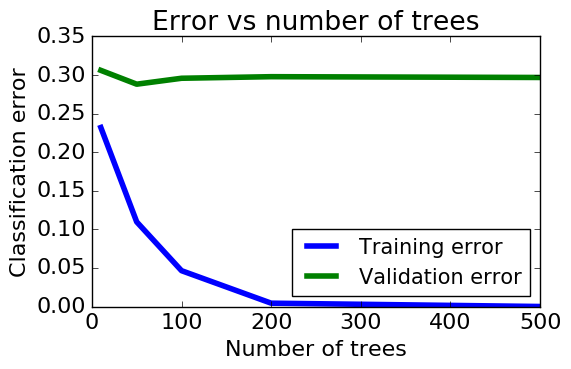

In [79]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(10,5), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')